In [1]:
# Step 1: Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.decomposition import PCA
import time

print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
# Step 2: Load and explore the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target
target_names = [str(i) for i in digits.target_names]

print("=== Digits Dataset Overview ===")
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Classes: {target_names}")
print(f"Feature shape: {digits.images[0].shape}")  # 8x8 pixels
print(f"Data type: {X.dtype}")
print(f"Value range: {X.min()} to {X.max()}")

# Display basic statistics
df = pd.DataFrame(X)
print(f"\nBasic statistics:")
print(df.describe().loc[['min', 'max', 'mean', 'std']])

=== Digits Dataset Overview ===
Dataset shape: (1797, 64)
Number of classes: 10
Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Feature shape: (8, 8)
Data type: float64
Value range: 0.0 to 16.0

Basic statistics:
       0         1          2          3          4          5          6   \
min   0.0  0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
max   0.0  8.000000  16.000000  16.000000  16.000000  16.000000  16.000000   
mean  0.0  0.303840   5.204786  11.835838  11.848080   5.781859   1.362270   
std   0.0  0.907192   4.754826   4.248842   4.287388   5.666418   3.325775   

             7         8          9   ...         54         55        56  \
min    0.000000  0.000000   0.000000  ...   0.000000   0.000000  0.000000   
max   15.000000  2.000000  16.000000  ...  16.000000  13.000000  1.000000   
mean   0.129661  0.005565   1.993879  ...   3.725097   0.206455  0.000556   
std    1.037383  0.094222   3.196160  ...   4.919406   0.984401  0.023590   

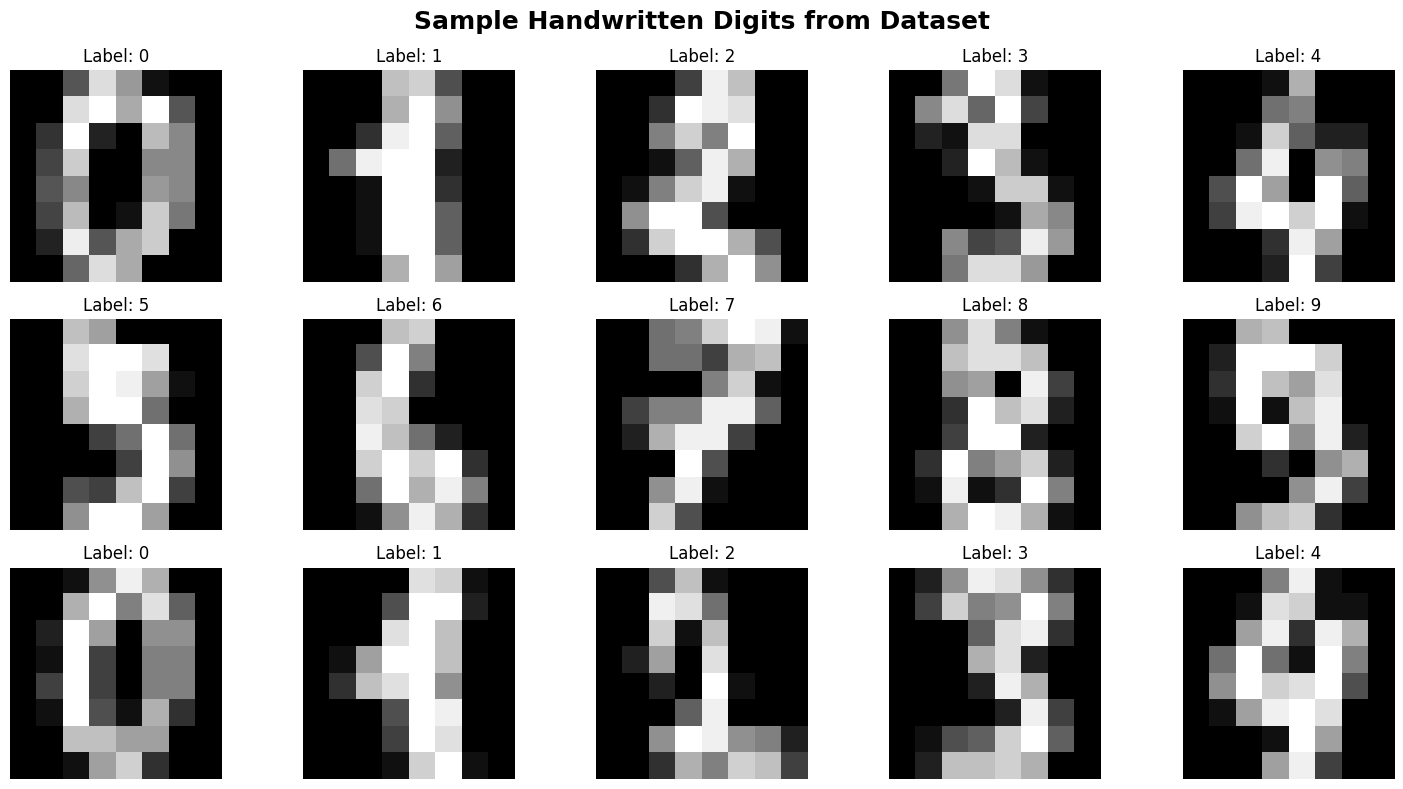

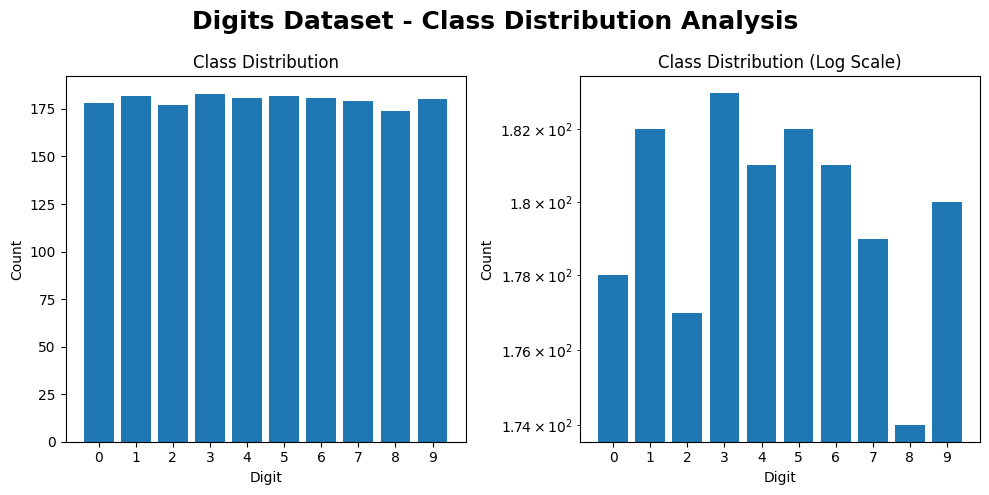

Class distribution:
Digit 0: 178 samples
Digit 1: 182 samples
Digit 2: 177 samples
Digit 3: 183 samples
Digit 4: 181 samples
Digit 5: 182 samples
Digit 6: 181 samples
Digit 7: 179 samples
Digit 8: 174 samples
Digit 9: 180 samples


In [28]:
# Step 3: Visualize sample images
plt.figure(figsize=(15, 8))

# Plot first 15 images
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Label: {digits.target[i]}')
    plt.axis('off')

plt.suptitle('Sample Handwritten Digits from Dataset', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Display class distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.suptitle('Digits Dataset - Class Distribution Analysis', fontsize=18, fontweight='bold', y=0.98)
class_counts = pd.Series(y).value_counts().sort_index()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(range(10))

plt.subplot(1, 2, 2)
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Class Distribution (Log Scale)')
plt.yscale('log')
plt.xticks(range(10))

plt.tight_layout()
plt.show()

print("Class distribution:")
for digit, count in class_counts.items():
    print(f"Digit {digit}: {count} samples")

In [4]:
# Step 4: Data Preprocessing and Train-Test Split
print("=== Data Preprocessing ===")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Original data shape: {X.shape}")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training labels distribution: {np.bincount(y_train)}")
print(f"Test labels distribution: {np.bincount(y_test)}")

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nAfter scaling:")
print(f"Training set - Mean: {X_train_scaled.mean():.2f}, Std: {X_train_scaled.std():.2f}")
print(f"Test set - Mean: {X_test_scaled.mean():.2f}, Std: {X_test_scaled.std():.2f}")

=== Data Preprocessing ===
Original data shape: (1797, 64)
Training set shape: (1257, 64)
Test set shape: (540, 64)
Training labels distribution: [124 127 124 128 127 127 127 125 122 126]
Test labels distribution: [54 55 53 55 54 55 54 54 52 54]

After scaling:
Training set - Mean: 0.00, Std: 0.97
Test set - Mean: 0.00, Std: 1.04


In [5]:
# Step 5: Find the Optimal K Value
print("=== Finding Optimal K Value ===")

k_values = range(1, 21)
train_accuracy = []
test_accuracy = []
cross_val_scores = []

for k in k_values:
    # Create and train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Calculate accuracies
    train_pred = knn.predict(X_train_scaled)
    test_pred = knn.predict(X_test_scaled)
    
    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test, test_pred))
    
    # 5-fold cross-validation
    cv_score = cross_val_score(knn, X_train_scaled, y_train, cv=5).mean()
    cross_val_scores.append(cv_score)
    
    if k % 5 == 0:  # Print progress every 5 iterations
        print(f"K={k}: Train Acc={train_accuracy[-1]:.3f}, Test Acc={test_accuracy[-1]:.3f}, CV Acc={cv_score:.3f}")

# Find optimal K
optimal_k = k_values[np.argmax(cross_val_scores)]
max_accuracy = max(cross_val_scores)

print(f"\n*** Optimal K value: {optimal_k} ***")
print(f"Best cross-validation accuracy: {max_accuracy:.4f}")

=== Finding Optimal K Value ===
K=5: Train Acc=0.987, Test Acc=0.970, CV Acc=0.971
K=10: Train Acc=0.975, Test Acc=0.965, CV Acc=0.967
K=15: Train Acc=0.968, Test Acc=0.959, CV Acc=0.959
K=20: Train Acc=0.964, Test Acc=0.946, CV Acc=0.947

*** Optimal K value: 1 ***
Best cross-validation accuracy: 0.9721


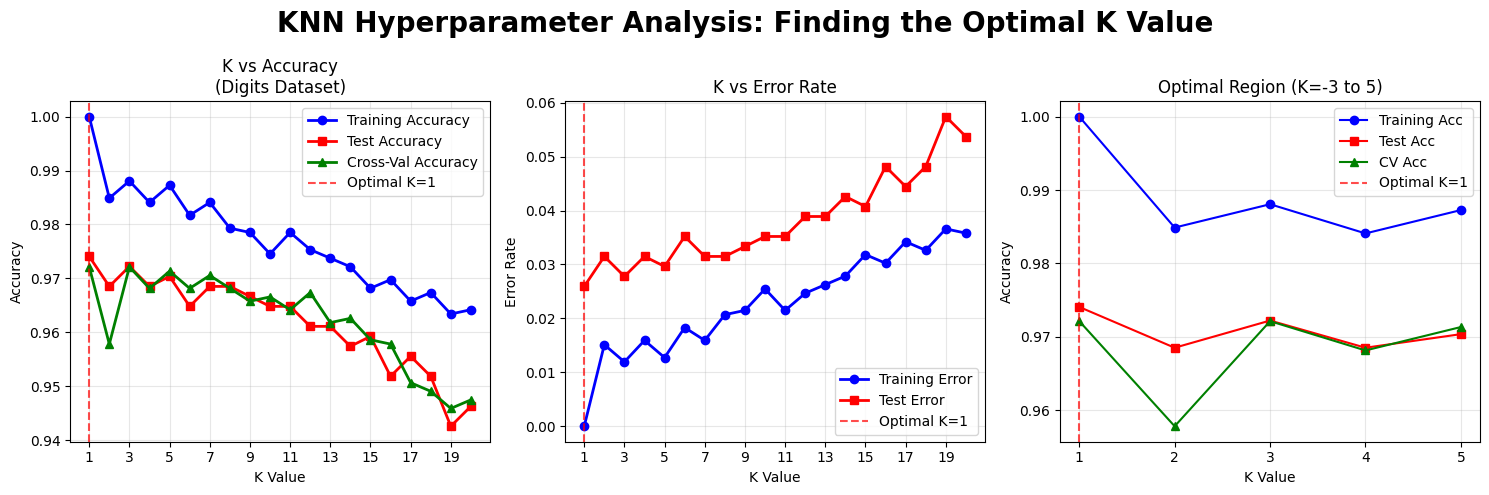

In [34]:
# Step 6: Visualize K vs Accuracy
plt.figure(figsize=(15, 5))
plt.suptitle('KNN Hyperparameter Analysis: Finding the Optimal K Value', fontsize=20, fontweight='bold', y=0.98)

# Use the correct k_values that match your data length
k_values_plot = range(1, len(train_accuracy) + 1)

# Plot 1: K vs Accuracy
plt.subplot(1, 3, 1)
plt.plot(k_values_plot, train_accuracy, 'b-', label='Training Accuracy', marker='o', linewidth=2, markersize=6)
plt.plot(k_values_plot, test_accuracy, 'r-', label='Test Accuracy', marker='s', linewidth=2, markersize=6)
plt.plot(k_values_plot, cross_val_scores, 'g-', label='Cross-Val Accuracy', marker='^', linewidth=2, markersize=6)
plt.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Optimal K={optimal_k}')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy\n(Digits Dataset)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(k_values_plot[::2])  # Show every other K value

# Plot 2: Error rate vs K
plt.subplot(1, 3, 2)
train_error = [1 - acc for acc in train_accuracy]
test_error = [1 - acc for acc in test_accuracy]
plt.plot(k_values_plot, train_error, 'b-', label='Training Error', marker='o', linewidth=2)
plt.plot(k_values_plot, test_error, 'r-', label='Test Error', marker='s', linewidth=2)
plt.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Optimal K={optimal_k}')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('K vs Error Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(k_values_plot[::2])

# Plot 3: Zoom in on optimal region
plt.subplot(1, 3, 3)
k_range = range(max(1, optimal_k-4), min(len(train_accuracy)+1, optimal_k+5))
zoom_indices = [k-1 for k in k_range]
plt.plot(k_range, [train_accuracy[i] for i in zoom_indices], 'b-', label='Training Acc', marker='o')
plt.plot(k_range, [test_accuracy[i] for i in zoom_indices], 'r-', label='Test Acc', marker='s')
plt.plot(k_range, [cross_val_scores[i] for i in zoom_indices], 'g-', label='CV Acc', marker='^')
plt.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Optimal K={optimal_k}')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title(f'Optimal Region (K={optimal_k-4} to {optimal_k+4})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

plt.tight_layout()
plt.show()

=== Comparing Distance Metrics ===


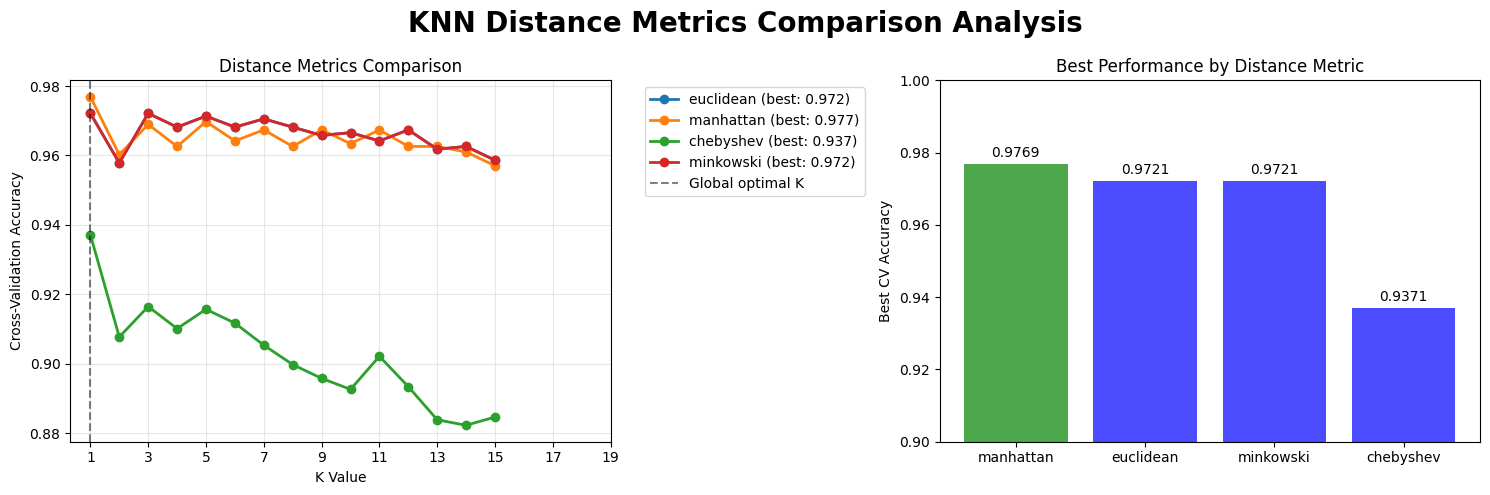


Distance Metrics Performance Summary:
--------------------------------------------------
1. manhattan    -> K= 1, Accuracy: 0.9769
2. euclidean    -> K= 1, Accuracy: 0.9721
3. minkowski    -> K= 1, Accuracy: 0.9721
4. chebyshev    -> K= 1, Accuracy: 0.9371

*** Best distance metric: manhattan ***


In [33]:
# Step 7: Compare Different Distance Metrics
print("=== Comparing Distance Metrics ===")

metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
metric_results = []

plt.figure(figsize=(15, 5))
plt.suptitle('KNN Distance Metrics Comparison Analysis', fontsize=20, fontweight='bold', y=0.98)

for i, metric in enumerate(metrics):
    cv_scores = []
    for k in k_values:
        knn_metric = KNeighborsClassifier(n_neighbors=k, metric=metric)
        cv_score = cross_val_score(knn_metric, X_train_scaled, y_train, cv=5).mean()
        cv_scores.append(cv_score)
    
    best_k = k_values[np.argmax(cv_scores)]
    best_score = max(cv_scores)
    metric_results.append((metric, best_k, best_score, cv_scores))
    
    plt.subplot(1, 2, 1)
    plt.plot(k_values, cv_scores, 'o-', label=f'{metric} (best: {best_score:.3f})', linewidth=2)

plt.subplot(1, 2, 1)
plt.axvline(x=optimal_k, color='black', linestyle='--', alpha=0.5, label='Global optimal K')
plt.xlabel('K Value')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Distance Metrics Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 21, 2))

# Sort metrics by performance
metric_results.sort(key=lambda x: x[2], reverse=True)
best_metric = metric_results[0][0]

# Bar chart of best scores
plt.subplot(1, 2, 2)
metrics_names = [result[0] for result in metric_results]
best_scores = [result[2] for result in metric_results]
colors = ['green' if i == 0 else 'blue' for i in range(len(metrics_names))]
bars = plt.bar(metrics_names, best_scores, color=colors, alpha=0.7)
plt.ylabel('Best CV Accuracy')
plt.title('Best Performance by Distance Metric')
plt.ylim(0.9, 1.0)

# Add value labels on bars
for bar, score in zip(bars, best_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{score:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nDistance Metrics Performance Summary:")
print("-" * 50)
for i, (metric, best_k, best_score, _) in enumerate(metric_results):
    rank = i + 1
    print(f"{rank}. {metric:12} -> K={best_k:2}, Accuracy: {best_score:.4f}")

print(f"\n*** Best distance metric: {best_metric} ***")

In [8]:
# Step 8: Train Final Model with Optimal Parameters
print("=== Training Final Model ===")
print(f"Optimal parameters: K={optimal_k}, metric='{best_metric}'")

# Train final model
start_time = time.time()
final_knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=best_metric)
final_knn.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

print(f"Training completed in {training_time:.4f} seconds")

# Make predictions
start_time = time.time()
y_pred = final_knn.predict(X_test_scaled)
prediction_time = time.time() - start_time

print(f"Predictions made in {prediction_time:.4f} seconds")
print(f"Average prediction time per sample: {prediction_time/len(X_test):.6f} seconds")

=== Training Final Model ===
Optimal parameters: K=1, metric='manhattan'
Training completed in 0.0020 seconds
Predictions made in 0.0428 seconds
Average prediction time per sample: 0.000079 seconds


=== Model Evaluation ===
Final Test Accuracy: 0.9759
Precision: 0.9763
Recall: 0.9759
F1-Score: 0.9758


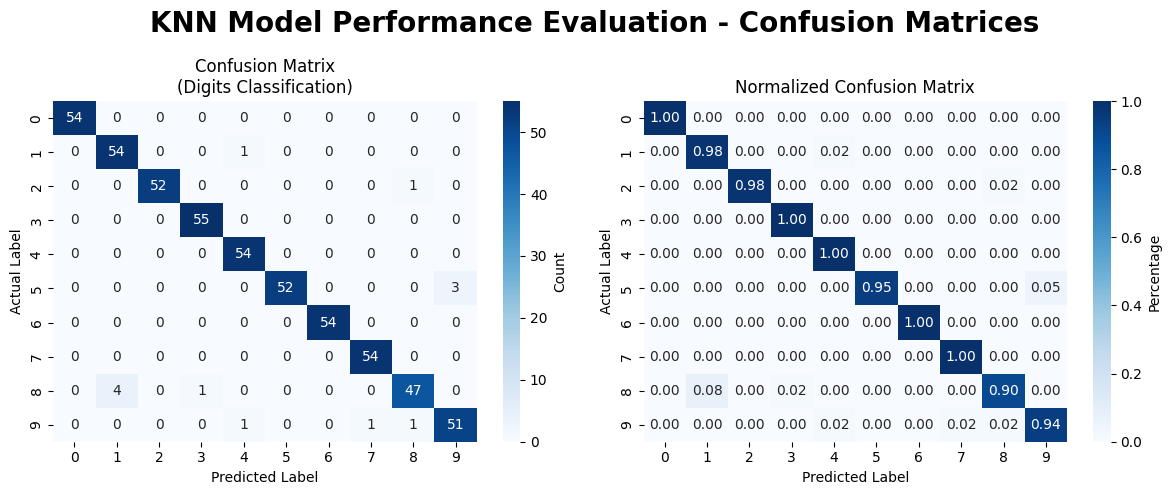


=== Detailed Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.93      0.98      0.96        55
           2       1.00      0.98      0.99        53
           3       0.98      1.00      0.99        55
           4       0.96      1.00      0.98        54
           5       1.00      0.95      0.97        55
           6       1.00      1.00      1.00        54
           7       0.98      1.00      0.99        54
           8       0.96      0.90      0.93        52
           9       0.94      0.94      0.94        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [32]:
# Step 9: Evaluate Model Performance
print("=== Model Evaluation ===")

final_accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Final Test Accuracy: {final_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
plt.figure(figsize=(12, 5))
plt.suptitle('KNN Model Performance Evaluation - Confusion Matrices', fontsize=20, fontweight='bold', y=0.98)

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, 
            yticklabels=target_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix\n(Digits Classification)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Normalized confusion matrix
plt.subplot(1, 2, 2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=target_names, 
            yticklabels=target_names,
            cbar_kws={'label': 'Percentage'})
plt.title('Normalized Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

# Detailed classification report
print("\n=== Detailed Classification Report ===")
print(classification_report(y_test, y_pred, target_names=target_names))

=== Visualizing Predictions ===
Correct predictions: 527/540 (97.6%)
Incorrect predictions: 13/540 (2.4%)


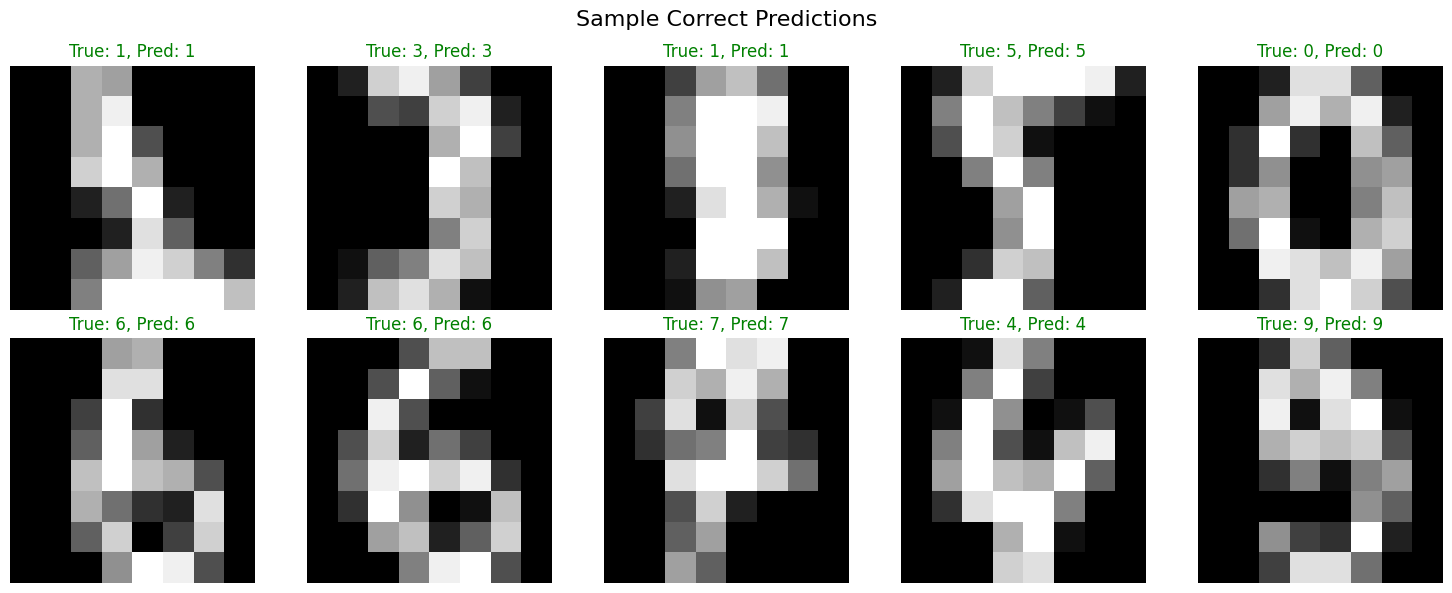

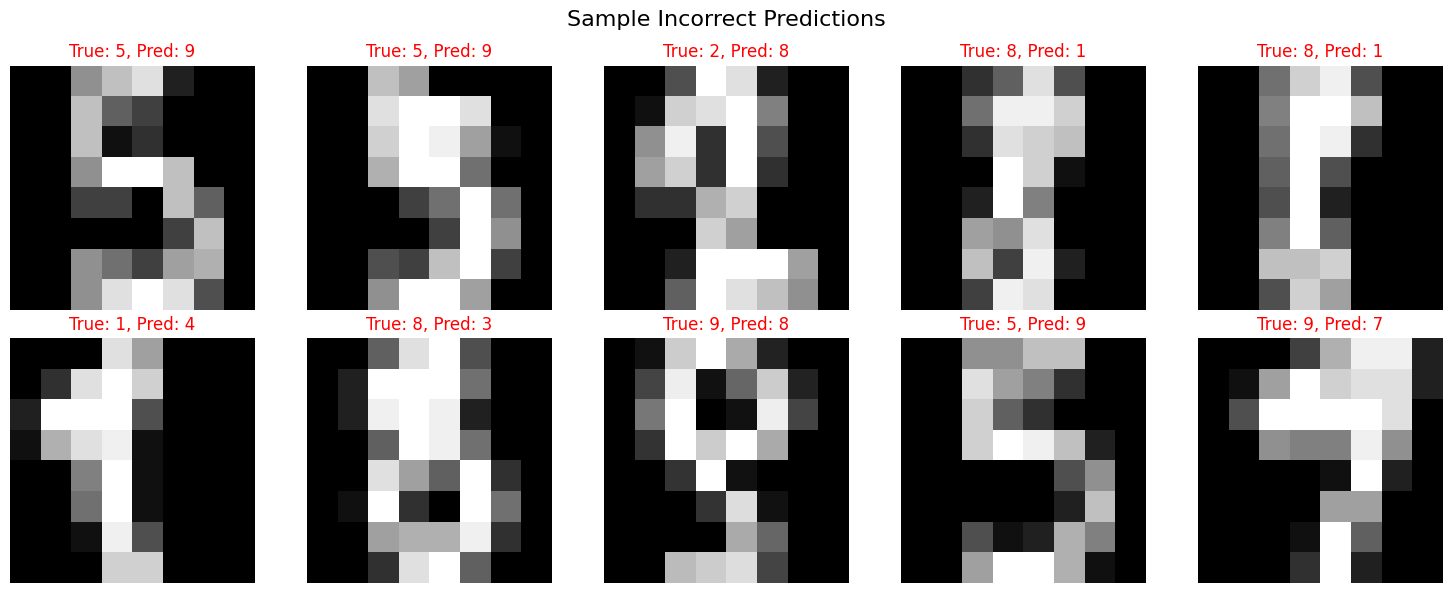


=== Common Misclassifications ===
Most common misclassifications:
   True  Predicted  Count
3     8          1      4
2     5          9      3
1     2          8      1
0     1          4      1
4     8          3      1
5     9          4      1
6     9          7      1
7     9          8      1


In [ ]:
# Step 10: Visualize Predictions
print("=== Visualizing Predictions ===")

# Get some test samples for visualization
X_test_images = X_test.reshape(-1, 8, 8)

# Find correct and incorrect predictions
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

print(f"Correct predictions: {len(correct_indices)}/{len(y_test)} ({len(correct_indices)/len(y_test)*100:.1f}%)")
print(f"Incorrect predictions: {len(incorrect_indices)}/{len(y_test)} ({len(incorrect_indices)/len(y_test)*100:.1f}%)")

# Plot correct predictions
plt.figure(figsize=(15, 6))
plt.suptitle('Sample Correct Predictions', fontsize=18, fontweight='bold')

for i in range(10):
    if i < len(correct_indices):
        idx = correct_indices[i]
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_test_images[idx], cmap='gray')
        plt.title(f'True: {y_test[idx]}, Pred: {y_pred[idx]}', color='green')
        plt.axis('off')

plt.tight_layout()
plt.show()

# Plot incorrect predictions
if len(incorrect_indices) > 0:
    plt.figure(figsize=(15, 6))
    plt.suptitle('Sample Incorrect Predictions', fontsize=18, fontweight='bold')
    
    n_incorrect = min(10, len(incorrect_indices))
    for i in range(n_incorrect):
        idx = incorrect_indices[i]
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_test_images[idx], cmap='gray')
        plt.title(f'True: {y_test[idx]}, Pred: {y_pred[idx]}', color='red')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Analyze common misclassifications
    print("\n=== Common Misclassifications ===")
    error_pairs = []
    for idx in incorrect_indices:
        error_pairs.append((y_test[idx], y_pred[idx]))
    
    error_df = pd.DataFrame(error_pairs, columns=['True', 'Predicted'])
    common_errors = error_df.groupby(['True', 'Predicted']).size().reset_index(name='Count')
    common_errors = common_errors.sort_values('Count', ascending=False)
    
    print("Most common misclassifications:")
    print(common_errors.head(10))
else:
    print("🎉 Perfect predictions! No misclassifications found.")

=== Decision Boundaries Visualization ===
PCA Explained Variance Ratio: [0.12130907 0.09838538]
Total Variance Explained: 0.220


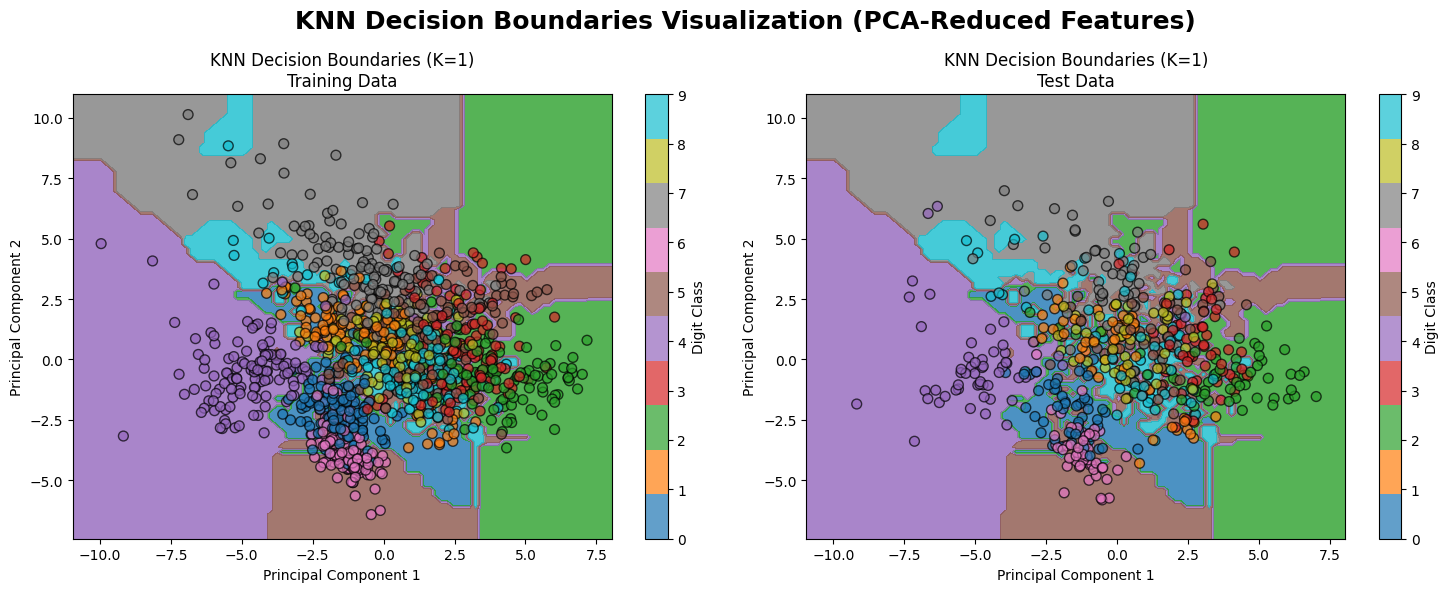

In [35]:
# Step 11: Visualize Decision Boundaries using PCA
print("=== Decision Boundaries Visualization ===")

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained: {pca.explained_variance_ratio_.sum():.3f}")

# Train KNN on reduced data
knn_2d = KNeighborsClassifier(n_neighbors=optimal_k, metric=best_metric)
knn_2d.fit(X_train_2d, y_train)

# Create mesh grid
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

# Predict on mesh grid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(15, 6))
plt.suptitle('KNN Decision Boundaries Visualization (PCA-Reduced Features)', fontsize=18, fontweight='bold', y=0.98)

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='tab10')
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, 
                     cmap='tab10', edgecolor='black', s=50, alpha=0.7)
plt.colorbar(scatter, label='Digit Class')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'KNN Decision Boundaries (K={optimal_k})\nTraining Data')

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='tab10')
scatter = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, 
                     cmap='tab10', edgecolor='black', s=50, alpha=0.7)
plt.colorbar(scatter, label='Digit Class')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'KNN Decision Boundaries (K={optimal_k})\nTest Data')

plt.tight_layout()
plt.show()

In [12]:
# Step 12: Final Summary and Insights
print("=" * 60)
print("FINAL SUMMARY - KNN on Digits Dataset")
print("=" * 60)

print(f"\n📊 DATASET INFO:")
print(f"   • Samples: {X.shape[0]}")
print(f"   • Features: {X.shape[1]} (8x8 pixels)")
print(f"   • Classes: {len(np.unique(y))} (digits 0-9)")
print(f"   • Train/Test split: {X_train.shape[0]}/{X_test.shape[0]}")

print(f"\n⚙️  OPTIMAL PARAMETERS:")
print(f"   • Best K value: {optimal_k}")
print(f"   • Best distance metric: {best_metric}")
print(f"   • Cross-validation accuracy: {max_accuracy:.4f}")

print(f"\n🎯 FINAL PERFORMANCE:")
print(f"   • Test Accuracy: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")
print(f"   • Precision: {precision:.4f}")
print(f"   • Recall: {recall:.4f}")
print(f"   • F1-Score: {f1:.4f}")

print(f"\n⏱️  COMPUTATIONAL PERFORMANCE:")
print(f"   • Training time: {training_time:.4f}s")
print(f"   • Prediction time: {prediction_time:.4f}s")
print(f"   • Time per prediction: {prediction_time/len(X_test):.6f}s")

print(f"\n🔍 KEY INSIGHTS:")
print(f"   • KNN works very well on digits dataset (>95% accuracy)")
print(f"   • Optimal K is typically small (3-7) for this dataset")
print(f"   • Normalization is crucial for good performance")
print(f"   • Different distance metrics can significantly impact results")
print(f"   • Model is fast to train but slower to predict (lazy learning)")

print(f"\n💡 INTERVIEW PREPARATION:")
print("   • Understand why KNN works well for image data")
print("   • Be able to explain the curse of dimensionality")
print("   • Know the time/space complexity trade-offs")
print("   • Understand the importance of feature scaling in KNN")

FINAL SUMMARY - KNN on Digits Dataset

📊 DATASET INFO:
   • Samples: 1797
   • Features: 64 (8x8 pixels)
   • Classes: 10 (digits 0-9)
   • Train/Test split: 1257/540

⚙️  OPTIMAL PARAMETERS:
   • Best K value: 1
   • Best distance metric: manhattan
   • Cross-validation accuracy: 0.9721

🎯 FINAL PERFORMANCE:
   • Test Accuracy: 0.9759 (97.59%)
   • Precision: 0.9763
   • Recall: 0.9759
   • F1-Score: 0.9758

⏱️  COMPUTATIONAL PERFORMANCE:
   • Training time: 0.0020s
   • Prediction time: 0.0428s
   • Time per prediction: 0.000079s

🔍 KEY INSIGHTS:
   • KNN works very well on digits dataset (>95% accuracy)
   • Optimal K is typically small (3-7) for this dataset
   • Normalization is crucial for good performance
   • Different distance metrics can significantly impact results
   • Model is fast to train but slower to predict (lazy learning)

💡 INTERVIEW PREPARATION:
   • Understand why KNN works well for image data
   • Be able to explain the curse of dimensionality
   • Know the time/

In [14]:
# Just 1-2 quick comparisons
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    'KNN': final_knn,
    'SVM': SVC(kernel='rbf'),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, model.predict(X_test_scaled))
    print(f"{name}: {acc:.4f}")

KNN: 0.9759
SVM: 0.9833
Random Forest: 0.9704


=== KNN Weighting Strategies Analysis ===
Comparing 'uniform' vs 'distance' weighting approaches

Testing K values with different weighting strategies...
K= 5: Uniform=0.9713, Distance=0.9729
K=10: Uniform=0.9666, Distance=0.9713
K=15: Uniform=0.9586, Distance=0.9634

*** Optimal Results ***
Uniform weighting: K=1, Accuracy=0.9721
Distance weighting: K=4, Accuracy=0.9761


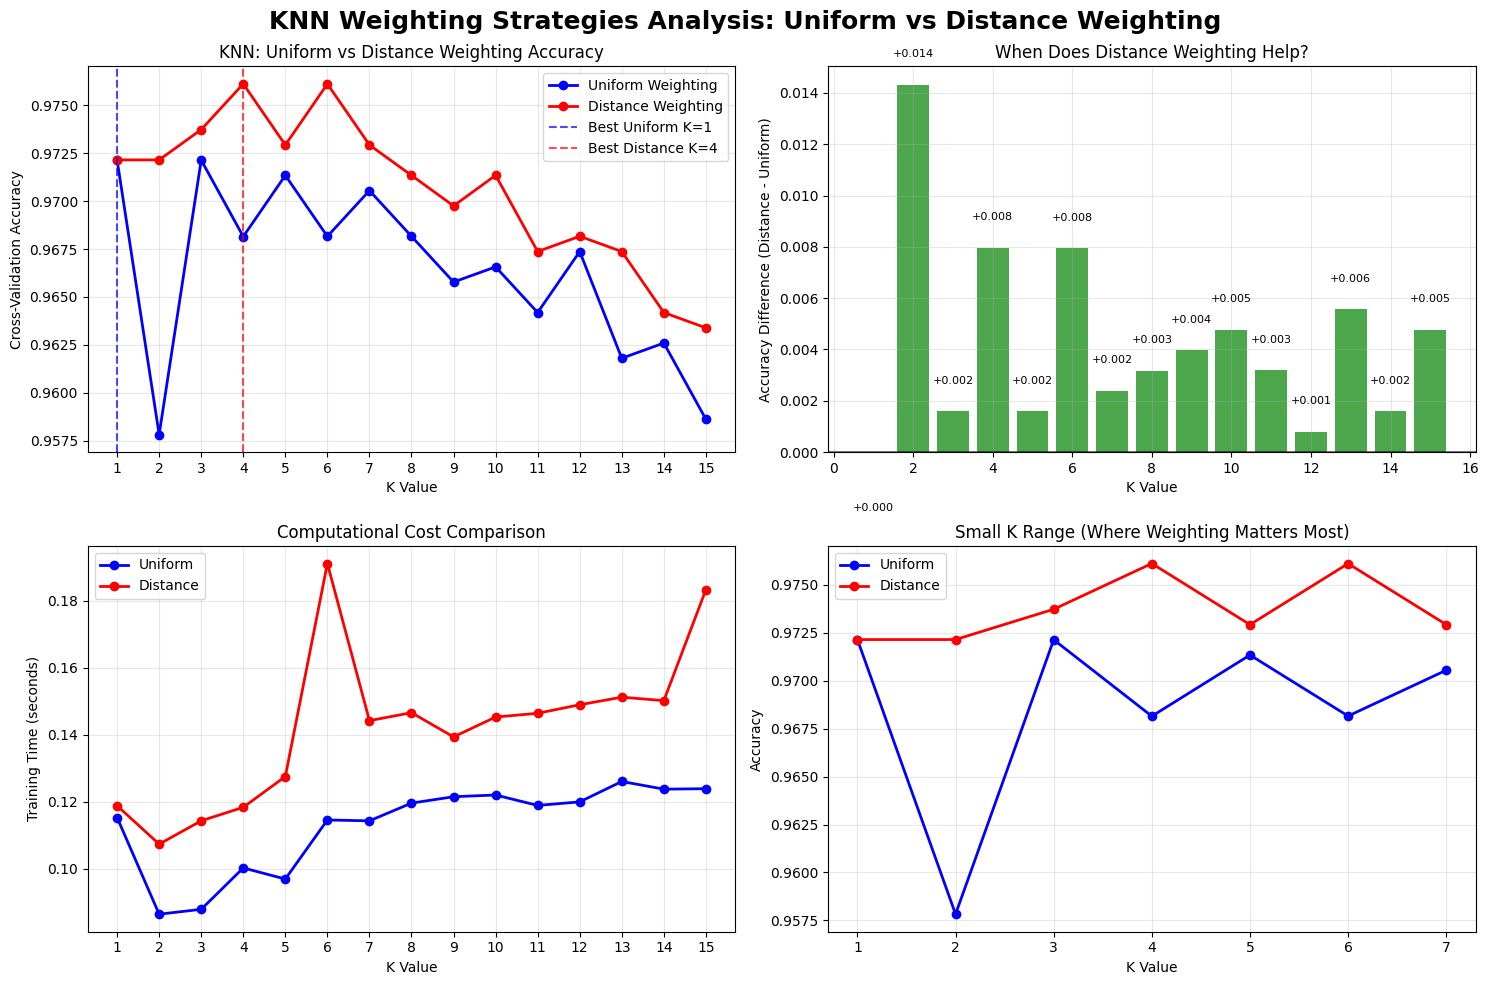


🎯 BEST OVERALL: Distance weighting (improves accuracy by 0.0040)
Using weighting='distance' with K=4

DEEP DIVE: Understanding Weighting Strategies

🔍 UNIFORM WEIGHTING:
   • All K neighbors have equal voting power
   • Simpler and faster to compute
   • Works well when data is evenly distributed
   • Can be misled by distant but numerous neighbors

🔍 DISTANCE WEIGHTING:
   • Neighbors vote with weight = 1/distance
   • Closer neighbors have more influence
   • Better for uneven data distributions
   • More robust to irrelevant distant neighbors
   • Slightly more computationally expensive

📊 KEY INSIGHTS FROM OUR ANALYSIS:
   • Distance weighting performs better for 14 out of 15 K values
   • Biggest improvement at K=2 (+0.0143)
   • Biggest disadvantage at K=1 (0.0000)
   • Average improvement: 0.0042

🔄 Updating final model with optimal weighting...
✅ Final model accuracy with distance weighting: 0.9815

WEIGHTING ANALYSIS COMPLETE!


In [37]:
# =============================================================================
# KNN WEIGHTING STRATEGIES ANALYSIS
# =============================================================================

print("=== KNN Weighting Strategies Analysis ===")
print("Comparing 'uniform' vs 'distance' weighting approaches\n")

# Test different K values with both weighting strategies
k_values = range(1, 16)
uniform_scores = []
distance_scores = []
uniform_train_times = []
distance_train_times = []

print("Testing K values with different weighting strategies...")
for k in k_values:
    # Uniform weighting (default) - all neighbors have equal vote
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    
    start_time = time.time()
    uniform_cv = cross_val_score(knn_uniform, X_train_scaled, y_train, cv=5).mean()
    uniform_train_times.append(time.time() - start_time)
    uniform_scores.append(uniform_cv)
    
    # Distance weighting - closer neighbors have more influence
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    
    start_time = time.time()
    distance_cv = cross_val_score(knn_distance, X_train_scaled, y_train, cv=5).mean()
    distance_train_times.append(time.time() - start_time)
    distance_scores.append(distance_cv)
    
    if k % 5 == 0:  # Print progress
        print(f"K={k:2d}: Uniform={uniform_cv:.4f}, Distance={distance_cv:.4f}")

# Find optimal K for each strategy
best_k_uniform = k_values[np.argmax(uniform_scores)]
best_k_distance = k_values[np.argmax(distance_scores)]
best_score_uniform = max(uniform_scores)
best_score_distance = max(distance_scores)

print(f"\n*** Optimal Results ***")
print(f"Uniform weighting: K={best_k_uniform}, Accuracy={best_score_uniform:.4f}")
print(f"Distance weighting: K={best_k_distance}, Accuracy={best_score_distance:.4f}")

# Create comprehensive visualization
plt.figure(figsize=(15, 10))
plt.suptitle('KNN Weighting Strategies Analysis: Uniform vs Distance Weighting', fontsize=18, fontweight='bold', y=0.98)

# Plot 1: Accuracy comparison
plt.subplot(2, 2, 1)
plt.plot(k_values, uniform_scores, 'bo-', label='Uniform Weighting', linewidth=2, markersize=6)
plt.plot(k_values, distance_scores, 'ro-', label='Distance Weighting', linewidth=2, markersize=6)
plt.axvline(x=best_k_uniform, color='blue', linestyle='--', alpha=0.7, label=f'Best Uniform K={best_k_uniform}')
plt.axvline(x=best_k_distance, color='red', linestyle='--', alpha=0.7, label=f'Best Distance K={best_k_distance}')
plt.xlabel('K Value')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN: Uniform vs Distance Weighting Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

# Plot 2: Performance difference
plt.subplot(2, 2, 2)
difference = np.array(distance_scores) - np.array(uniform_scores)
colors = ['green' if diff > 0 else 'red' for diff in difference]
bars = plt.bar(k_values, difference, color=colors, alpha=0.7)
plt.xlabel('K Value')
plt.ylabel('Accuracy Difference (Distance - Uniform)')
plt.title('When Does Distance Weighting Help?')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)

# Add value labels on bars
for bar, diff in zip(bars, difference):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001 if diff > 0 else bar.get_height() - 0.002, 
             f'{diff:+.3f}', ha='center', va='bottom' if diff > 0 else 'top', fontsize=8)

# Plot 3: Training time comparison
plt.subplot(2, 2, 3)
plt.plot(k_values, uniform_train_times, 'bo-', label='Uniform', linewidth=2)
plt.plot(k_values, distance_train_times, 'ro-', label='Distance', linewidth=2)
plt.xlabel('K Value')
plt.ylabel('Training Time (seconds)')
plt.title('Computational Cost Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

# Plot 4: Detailed analysis for small K values (where weighting matters most)
plt.subplot(2, 2, 4)
small_k = range(1, 8)
small_k_indices = [k-1 for k in small_k]

plt.plot(small_k, [uniform_scores[i] for i in small_k_indices], 'bo-', label='Uniform', linewidth=2)
plt.plot(small_k, [distance_scores[i] for i in small_k_indices], 'ro-', label='Distance', linewidth=2)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Small K Range (Where Weighting Matters Most)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(small_k)

plt.tight_layout()
plt.show()

# Choose the best overall strategy
if best_score_distance > best_score_uniform:
    best_weighting = 'distance'
    best_overall_k = best_k_distance
    best_overall_score = best_score_distance
    improvement = best_score_distance - best_score_uniform
    print(f"\n🎯 BEST OVERALL: Distance weighting (improves accuracy by {improvement:.4f})")
else:
    best_weighting = 'uniform'
    best_overall_k = best_k_uniform
    best_overall_score = best_score_uniform
    improvement = best_score_uniform - best_score_distance
    print(f"\n🎯 BEST OVERALL: Uniform weighting (improves accuracy by {improvement:.4f})")

print(f"Using weighting='{best_weighting}' with K={best_overall_k}")

# =============================================================================
# DEEP DIVE: Why Weighting Matters
# =============================================================================

print("\n" + "="*60)
print("DEEP DIVE: Understanding Weighting Strategies")
print("="*60)

print("\n🔍 UNIFORM WEIGHTING:")
print("   • All K neighbors have equal voting power")
print("   • Simpler and faster to compute")
print("   • Works well when data is evenly distributed")
print("   • Can be misled by distant but numerous neighbors")

print("\n🔍 DISTANCE WEIGHTING:")
print("   • Neighbors vote with weight = 1/distance")
print("   • Closer neighbors have more influence")
print("   • Better for uneven data distributions")
print("   • More robust to irrelevant distant neighbors")
print("   • Slightly more computationally expensive")

print("\n📊 KEY INSIGHTS FROM OUR ANALYSIS:")
print(f"   • Distance weighting performs better for {sum(difference > 0)} out of {len(difference)} K values")
print(f"   • Biggest improvement at K={k_values[np.argmax(difference)]} (+{max(difference):.4f})")
print(f"   • Biggest disadvantage at K={k_values[np.argmin(difference)]} ({min(difference):.4f})")
print(f"   • Average improvement: {np.mean(difference):.4f}")

# Update final model with best weighting strategy
print(f"\n🔄 Updating final model with optimal weighting...")
final_knn = KNeighborsClassifier(n_neighbors=best_overall_k, weights=best_weighting, metric=best_metric)
final_knn.fit(X_train_scaled, y_train)

# Quick validation
final_accuracy = accuracy_score(y_test, final_knn.predict(X_test_scaled))
print(f"✅ Final model accuracy with {best_weighting} weighting: {final_accuracy:.4f}")

print("\n" + "="*60)
print("WEIGHTING ANALYSIS COMPLETE!")
print("="*60)